# StockPulse Stock Market Predictor
Team member: Siying Lu, Yue Peng, Tengjiao Wang

# Data Preprocessing
## Gathering data
Frequency: Daily
### AAPL 5-yr Historical Stock Price

In [1231]:
import requests
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

Data source for historical stock price: https://financialmodelingprep.com

Our friend has an active subscription for the financialmodelingprep.com, which provides more insights of financial data (features) compared to yahoo finance api.

For our model which utilizes basic features of a stock, it would be the same for using this API versus the yfinance API (we practice with TSLA stock below).

In [1232]:
marketDataApiUrl = "https://financialmodelingprep.com/api/v3/historical-price-full/AAPL?apikey=f616cbb6feaa67d70de3f40575e38f6f"
response = requests.get(marketDataApiUrl)
market_price_data = []
if response.status_code == 200:
    market_price_data = response.json()["historical"]
AAPL = pd.DataFrame(market_price_data)
# change date to pd.datetime format
AAPL["DATE"] = pd.to_datetime(AAPL["date"])
AAPL["company"] = "Apple"
# dropping unnecessary features
AAPL = AAPL.drop(columns=["date", "adjClose", "unadjustedVolume", "changePercent", "vwap", "label","changeOverTime"])

In [1233]:
AAPL.head(10)

,open,high,low,close,volume,change,DATE,company
0,169.53,170.61,168.15,169.89,49667176,0.365,2024-04-25,Apple
1,166.54,169.30,166.21,169.02,48251835,2.480,2024-04-24,Apple
2,165.35,167.05,164.92,166.90,49537761,1.550,2024-04-23,Apple
3,165.52,167.26,164.77,165.84,48116443,0.325,2024-04-22,Apple
4,166.21,166.40,164.08,165.00,68149377,-1.210,2024-04-19,Apple
5,168.03,168.64,166.55,167.04,43122903,-0.990,2024-04-18,Apple
6,169.61,170.65,168.00,168.00,50901210,-1.610,2024-04-17,Apple
7,171.75,173.76,168.27,169.38,73711235,-2.370,2024-04-16,Apple
8,175.36,176.63,172.50,172.69,73531773,-2.670,2024-04-15,Apple
9,174.26,178.36,174.21,176.55,101670886,2.290,2024-04-12,Apple


In [1234]:
AAPL.describe()

,open,high,low,close,volume,change,DATE
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258
mean,131.470668,132.951121,130.094523,131.593188,9.784892e+07,0.122556,2021-10-24 21:34:37.583465728
min,43.860000,44.480000,42.570000,43.330000,2.404830e+07,-7.080000,2019-04-29 00:00:00
25%,97.065000,98.687500,96.167500,97.112500,6.419655e+07,-0.910000,2020-07-27 06:00:00
50%,142.725000,144.360000,141.005000,142.865000,8.460300e+07,0.120000,2021-10-23 12:00:00
75%,168.027500,169.540000,166.205000,167.560000,1.144590e+08,1.260000,2023-01-24 18:00:00
max,198.020000,199.620000,197.000000,198.110000,4.265100e+08,10.160000,2024-04-25 00:00:00
std,43.556904,43.887044,43.216140,43.566369,5.217064e+07,2.001550,NaN


In [1235]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   open     1258 non-null   float64       
 1   high     1258 non-null   float64       
 2   low      1258 non-null   float64       
 3   close    1258 non-null   float64       
 4   volume   1258 non-null   int64         
 5   change   1258 non-null   float64       
 6   DATE     1258 non-null   datetime64[ns]
 7   company  1258 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 78.8+ KB


Note: The data for the weekends are missing

### TSLA 5-yr Historical Stock Prices

#### Trying out the yfinance module with pandas_datareaders

In [1236]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)
TSLA = yf.download("TSLA", start, end)
TSLA.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600
2024-04-15,170.240005,170.690002,161.380005,161.479996,161.479996,100245300
2024-04-16,156.740005,158.190002,153.750000,157.110001,157.110001,97000000
2024-04-17,157.639999,158.330002,153.779999,155.449997,155.449997,82439700
2024-04-18,151.250000,152.199997,148.699997,149.929993,149.929993,96098800
2024-04-19,148.970001,150.940002,146.220001,147.050003,147.050003,86005100
2024-04-22,140.559998,144.440002,138.800003,142.050003,142.050003,107097600
2024-04-23,143.330002,147.259995,141.110001,144.679993,144.679993,124545100
2024-04-24,162.839996,167.970001,157.509995,162.130005,162.130005,181178000


#### Using Financialmodelingprep API

In [1237]:
marketDataApiUrl = "https://financialmodelingprep.com/api/v3/historical-price-full/TSLA?apikey=f616cbb6feaa67d70de3f40575e38f6f"
response = requests.get(marketDataApiUrl)
market_price_data = []
if response.status_code == 200:
    market_price_data = response.json()["historical"]
TSLA = pd.DataFrame(market_price_data)
TSLA["DATE"] = pd.to_datetime(TSLA["date"])
TSLA['company'] = 'Tesla'
# dropping unnecessary features
TSLA = TSLA.drop(columns=["date", "adjClose", "unadjustedVolume", "changePercent", "vwap", "label","changeOverTime"])

In [1238]:
TSLA.head(10)

,open,high,low,close,volume,change,DATE,company
0,158.96,170.88,158.36,170.18,124097872,11.220,2024-04-25,Tesla
1,162.84,167.97,157.51,162.13,181178020,-0.710,2024-04-24,Tesla
2,143.33,147.26,141.11,144.68,124545104,1.350,2024-04-23,Tesla
3,140.56,144.44,138.80,142.05,107097564,1.490,2024-04-22,Tesla
4,148.97,150.94,146.22,147.05,87074500,-1.920,2024-04-19,Tesla
5,151.25,152.20,148.70,149.93,96098830,-1.320,2024-04-18,Tesla
6,157.64,158.33,153.78,155.45,82439718,-2.190,2024-04-17,Tesla
7,156.74,158.19,153.75,157.11,96999956,0.368,2024-04-16,Tesla
8,170.24,170.69,161.38,161.48,100245310,-8.760,2024-04-15,Tesla
9,172.34,173.81,170.36,171.05,64722669,-1.290,2024-04-12,Tesla


In [1239]:
TSLA.describe()

,open,high,low,close,volume,change,DATE
count,1258.00000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258
mean,181.64772,185.701102,177.268757,181.583506,1.320070e+08,-0.064204,2021-10-24 21:34:37.583465728
min,12.07000,12.450000,11.800000,11.930000,2.940180e+07,-50.030000,2019-04-29 00:00:00
25%,99.74500,102.365000,97.535000,99.835000,8.042828e+07,-2.757500,2020-07-27 06:00:00
50%,203.66000,208.220000,198.510000,203.350000,1.075573e+08,0.030000,2021-10-23 12:00:00
75%,251.39250,256.572500,246.292500,251.845000,1.531274e+08,2.715000,2023-01-24 18:00:00
max,411.47000,414.500000,405.670000,409.970000,9.140820e+08,33.460000,2024-04-25 00:00:00
std,101.21359,103.344612,98.774843,101.050674,8.417628e+07,6.645230,NaN


In [1240]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   open     1258 non-null   float64       
 1   high     1258 non-null   float64       
 2   low      1258 non-null   float64       
 3   close    1258 non-null   float64       
 4   volume   1258 non-null   int64         
 5   change   1258 non-null   float64       
 6   DATE     1258 non-null   datetime64[ns]
 7   company  1258 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 78.8+ KB


### Visualization of Stock Prices with Closing Price: AAPL vs. TSLA

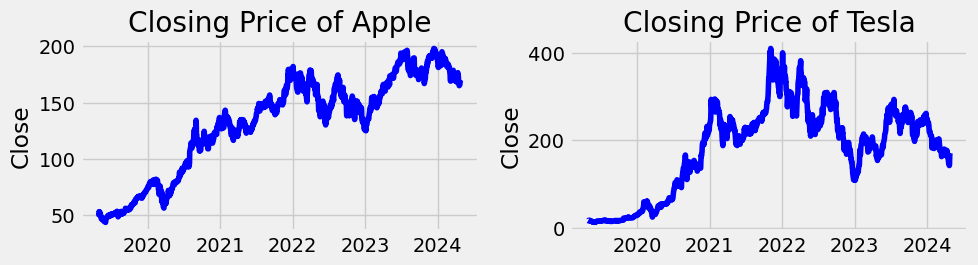

In [1241]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)

company_list = [AAPL, TSLA]

for i in range(2):
    plt.subplot(2, 2, i+1)  # 2 rows, 1 column, ith subplot
    plt.plot(company_list[i]['DATE'], company_list[i]['close'], color='blue')
    plt.ylabel('Close')
    plt.title(f"Closing Price of {company_list[i]['company'][0]}")
    
plt.tight_layout()

We can see that Tesla stock is more volatile than the Apple stock. We will compare the accuracy of the two models for these two stocks to see how if there's a difference for the performance.

### Other Features

#### U.S. Dollars to Euro Spot Exchange Rate (DEXUSEU)
frequency: daily

In [1242]:
data_exchange = pd.read_csv("DEXUSEU.csv", parse_dates=[0])
data_exchange.head()

,DATE,DEXUSEU
0,2019-04-19,1.1246
1,2019-04-22,1.1258
2,2019-04-23,1.1213
3,2019-04-24,1.1192
4,2019-04-25,1.114


In [1243]:
# DEXUSEU has data with "."
# replace it with np.nan and then ffill
data_exchange['DEXUSEU'] = data_exchange['DEXUSEU'].replace('.', np.nan)
data_exchange = data_exchange.ffill()

# change to numeric
data_exchange["DEXUSEU"] = pd.to_numeric(data_exchange["DEXUSEU"])
data_exchange.head(10)

,DATE,DEXUSEU
0,2019-04-19,1.1246
1,2019-04-22,1.1258
2,2019-04-23,1.1213
3,2019-04-24,1.1192
4,2019-04-25,1.1140
5,2019-04-26,1.1154
6,2019-04-29,1.1166
7,2019-04-30,1.1201
8,2019-05-01,1.1246
9,2019-05-02,1.1184


In [1244]:
data_exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1306 non-null   datetime64[ns]
 1   DEXUSEU  1306 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.5 KB


#### Dow Jones Index (DJIA)
Frequency: Daily

In [1245]:
data_dow = pd.read_csv("DJIA.csv", parse_dates = [0])
data_dow.head()

,DATE,DJIA
0,2019-04-22,26511.05
1,2019-04-23,26656.39
2,2019-04-24,26597.05
3,2019-04-25,26462.08
4,2019-04-26,26543.33


In [1246]:
data_dow['DJIA'] = data_dow['DJIA'].replace('.', np.nan)
data_dow = data_dow.ffill()
data_dow["DJIA"] = pd.to_numeric(data_dow["DJIA"])
data_dow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1306 non-null   datetime64[ns]
 1   DJIA    1306 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.5 KB


#### NASDAQ 100 Index (NASDAQ100)

In [1247]:
data_nas = pd.read_csv("NASDAQ100.csv", parse_dates=[0])
data_nas.head(10)

,DATE,NASDAQ100
0,2019-04-22,7713.49
1,2019-04-23,7810.71
2,2019-04-24,7784.41
3,2019-04-25,7816.92
4,2019-04-26,7826.68
5,2019-04-29,7839.04
6,2019-04-30,7781.46
7,2019-05-01,7751.85
8,2019-05-02,7724.06
9,2019-05-03,7845.73


In [1248]:
data_nas['NASDAQ100'] = data_nas['NASDAQ100'].replace('.', np.nan)
data_nas = data_nas.ffill()
data_nas["NASDAQ100"] = pd.to_numeric(data_nas["NASDAQ100"])
data_nas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       1306 non-null   datetime64[ns]
 1   NASDAQ100  1306 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.5 KB


#### California GDP (CARGSP)
frequency: yearly

In [1249]:
data_gdp = pd.read_csv("CARGSP.csv", parse_dates=[0])
data_gdp.head(5)

,DATE,CARGSP
0,2019-01-01,2962792.1
1,2020-01-01,2925146.9
2,2021-01-01,3146185.3
3,2022-01-01,3167460.8
4,2023-01-01,3233151.0


For the data of GDP, the frequency is yearly. Need to match it to daily

In [1250]:
data_new = {"DATE":[],"GDP":[]} # new series

for exchange_date in data_exchange['DATE']:
    for index , value in data_gdp.iterrows():
        if exchange_date.year == value.iloc[0].year:
            data_new['DATE'].append(exchange_date)
            data_new['GDP'].append(value.iloc[1])
data_new_gdp = pd.DataFrame(data_new)
data_new_gdp.head()

,DATE,GDP
0,2019-04-19,2962792.1
1,2019-04-22,2962792.1
2,2019-04-23,2962792.1
3,2019-04-24,2962792.1
4,2019-04-25,2962792.1


## Merging Data and Dropping Features

### Merging Data

In [1251]:
def merge(stock, data_exchange, data_gdp, data_dow, data_nas):
    merge1 = pd.merge(stock, data_exchange,left_on='DATE', right_on='DATE', how='inner')
    merge2 = pd.merge(merge1, data_gdp, left_on='DATE', right_on='DATE', how='inner')
    merge3 = pd.merge(merge2, data_dow, left_on='DATE', right_on='DATE', how='inner')
    merge4 = pd.merge(merge3, data_nas, left_on='DATE', right_on='DATE', how='inner')
    return merge4

In [1252]:
merge_AAPL = merge(AAPL, data_exchange, data_new_gdp, data_dow, data_nas)
merge_TSLA = merge(TSLA, data_exchange, data_new_gdp, data_dow, data_nas)

In [1253]:
merge_AAPL

,open,high,low,close,volume,change,DATE,company,DEXUSEU,GDP,DJIA,NASDAQ100
0,193.90,194.40,191.73,192.53,42672148,-1.37,2023-12-29,Apple,1.1062,3233151.0,37689.54,16825.93
1,194.14,194.66,193.17,193.58,34049898,-0.56,2023-12-28,Apple,1.1073,3233151.0,37710.10,16898.47
2,192.49,193.50,191.09,193.15,48087681,0.66,2023-12-27,Apple,1.1114,3233151.0,37656.52,16906.80
3,193.61,193.89,192.83,193.05,28919310,-0.56,2023-12-26,Apple,1.1035,3233151.0,37545.33,16878.46
4,195.18,195.41,192.97,193.60,37149570,-1.58,2023-12-22,Apple,1.1008,3233151.0,37385.97,16777.40
...,...,...,...,...,...,...,...,...,...,...,...,...
1173,52.72,52.96,52.56,52.94,83569600,0.22,2019-05-03,Apple,1.1186,2962792.1,26504.95,7845.73
1174,52.46,53.16,52.03,52.29,127985200,-0.17,2019-05-02,Apple,1.1184,2962792.1,26307.79,7724.06
1175,52.47,53.83,52.31,52.63,259309200,0.16,2019-05-01,Apple,1.1246,2962792.1,26430.14,7751.85
1176,50.76,50.85,49.78,50.17,186139600,-0.59,2019-04-30,Apple,1.1201,2962792.1,26592.91,7781.46


After merging, we can see that our most up-to-date data is on 2023-12-29 (last business day of 2023) since the 2024 GDP data is not available yet as of now.

### Adding a binary column "Trend" (increase, decrease) to the data set
If the stock price increased after 30 business days, then trend would be 1; otherwise, the trend is marked as 0.

In [1254]:
def trend_df(stock, days):
    z = len(stock)-1

    trend_df = {'DATE':[], "trend":[]}
    
    while z > days:
        # we are looking back at future 30 days, future - current > 0, increase (1)
        trend = stock['close'][z-days] - stock['close'][z]
        if trend >= 0:
            trend_df['DATE'].append(stock['DATE'][z])
            trend_df['trend'].append(1)
        else:
            trend_df['DATE'].append(stock['DATE'][z])
            trend_df['trend'].append(0)
        z-=1

    trend_df = pd.DataFrame(trend_df)
    return trend_df

In [1255]:
trend_AAPL = trend_df(merge_AAPL,30)
trend_TSLA = trend_df(merge_TSLA,30)

In [1256]:
trend_AAPL

,DATE,trend
0,2019-04-29,0
1,2019-04-30,0
2,2019-05-01,0
3,2019-05-02,0
4,2019-05-03,0
...,...,...
1142,2023-11-08,1
1143,2023-11-09,1
1144,2023-11-10,1
1145,2023-11-13,1


We are comparing the 30 days in future stock price versus now and gave conclusion to the trend feature. The rows after 2023-11-14 are dropped due to lack of data after 30 days.

In [1257]:
final_data_AAPL = pd.merge(merge_AAPL, trend_AAPL, left_on='DATE', right_on='DATE', how='inner')
final_data_TSLA = pd.merge(merge_TSLA, trend_TSLA, left_on='DATE', right_on='DATE', how='inner')

In [1258]:
final_data_AAPL = final_data_AAPL.drop(columns=['high','low','open'], axis=1)

In [1259]:
final_data_AAPL

,close,volume,change,DATE,company,DEXUSEU,GDP,DJIA,NASDAQ100,trend
0,187.44,60108400,-0.26,2023-11-14,Apple,1.0861,3233151.0,34827.70,15812.47,1
1,184.80,43627500,-1.02,2023-11-13,Apple,1.0700,3233151.0,34337.87,15482.79,1
2,186.40,66133400,2.43,2023-11-10,Apple,1.0710,3233151.0,34283.10,15529.12,1
3,182.41,53763500,-0.55,2023-11-09,Apple,1.0710,3233151.0,33891.94,15187.90,1
4,182.89,49340300,0.54,2023-11-08,Apple,1.0715,3233151.0,34112.27,15313.24,1
...,...,...,...,...,...,...,...,...,...,...
1142,52.94,83569600,0.22,2019-05-03,Apple,1.1186,2962792.1,26504.95,7845.73,0
1143,52.29,127985200,-0.17,2019-05-02,Apple,1.1184,2962792.1,26307.79,7724.06,0
1144,52.63,259309200,0.16,2019-05-01,Apple,1.1246,2962792.1,26430.14,7751.85,0
1145,50.17,186139600,-0.59,2019-04-30,Apple,1.1201,2962792.1,26592.91,7781.46,0


In [1260]:
final_data_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   close      1147 non-null   float64       
 1   volume     1147 non-null   int64         
 2   change     1147 non-null   float64       
 3   DATE       1147 non-null   datetime64[ns]
 4   company    1147 non-null   object        
 5   DEXUSEU    1147 non-null   float64       
 6   GDP        1147 non-null   float64       
 7   DJIA       1147 non-null   float64       
 8   NASDAQ100  1147 non-null   float64       
 9   trend      1147 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 89.7+ KB


In [1261]:
final_data_TSLA = final_data_TSLA.drop(columns=['high','low','open'], axis=1)

In [1262]:
final_data_TSLA

,close,volume,change,DATE,company,DEXUSEU,GDP,DJIA,NASDAQ100,trend
0,237.41,149762546,2.38,2023-11-14,Tesla,1.0861,3233151.0,34827.70,15812.47,1
1,223.71,140428469,8.11,2023-11-13,Tesla,1.0700,3233151.0,34337.87,15482.79,1
2,214.65,131295153,4.62,2023-11-10,Tesla,1.0710,3233151.0,34283.10,15529.12,1
3,209.98,142065154,-9.77,2023-11-09,Tesla,1.0710,3233151.0,33891.94,15187.90,1
4,222.11,106384841,-1.04,2023-11-08,Tesla,1.0715,3233151.0,34112.27,15313.24,1
...,...,...,...,...,...,...,...,...,...,...
1142,17.00,355602000,0.74,2019-05-03,Tesla,1.1186,2962792.1,26504.95,7845.73,0
1143,16.27,272389500,-0.10,2019-05-02,Tesla,1.1184,2962792.1,26307.79,7724.06,0
1144,15.60,160566000,-0.32,2019-05-01,Tesla,1.1246,2962792.1,26430.14,7751.85,0
1145,15.91,141969000,-0.23,2019-04-30,Tesla,1.1201,2962792.1,26592.91,7781.46,0


In [1263]:
final_data_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   close      1147 non-null   float64       
 1   volume     1147 non-null   int64         
 2   change     1147 non-null   float64       
 3   DATE       1147 non-null   datetime64[ns]
 4   company    1147 non-null   object        
 5   DEXUSEU    1147 non-null   float64       
 6   GDP        1147 non-null   float64       
 7   DJIA       1147 non-null   float64       
 8   NASDAQ100  1147 non-null   float64       
 9   trend      1147 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 89.7+ KB


In [1264]:
# checking out the final data in the csv file
final_data_AAPL.to_csv('final_data_AAPL.csv',index=False)
final_data_TSLA.to_csv('final_data_TSLA.csv',index=False)

# Modeling with LSTM Model for AAPL Stock

In [1265]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Starting with 3 features
Here will examine how's the modeling go with just basic features of the stock prices: close, volume, change

In [1266]:
Y = final_data_AAPL['trend']
X = final_data_AAPL.drop(columns=['trend','company','DATE','NASDAQ100','DEXUSEU','DJIA','GDP'], axis=1)

In [1267]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1147 non-null   float64
 1   volume  1147 non-null   int64  
 2   change  1147 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 27.0 KB


In [1268]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1147 entries, 0 to 1146
Series name: trend
Non-Null Count  Dtype
--------------  -----
1147 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [1269]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1270]:
X_test.shape

(230, 3)

In [1271]:
Y_test.shape

(230,)

In [1272]:
# Define sequence length (number of previous time steps to consider)
sequence_length = 30  # consider the previous 30 days

# Reshape the training data
def reshape_data(X_train_scaled, X_test_scaled, Y_test, sequence_length):
    X_train_reshaped = []
    for i in range(len(X_train_scaled) - sequence_length + 1):
        X_train_reshaped.append(X_train_scaled[i:i + sequence_length])
    
    X_train_reshaped = np.array(X_train_reshaped)
    
    # Reshape the testing data
    X_test_reshaped = []
    for i in range(len(X_test_scaled) - sequence_length + 1):
        X_test_reshaped.append(X_test_scaled[i:i + sequence_length])
        
    Y_test_reshaped = Y_test[sequence_length - 1:]

    return np.array(X_train_reshaped), np.array(X_test_reshaped), np.array(Y_test_reshaped)

X_train_reshaped, X_test_reshaped, Y_test_reshaped = reshape_data(X_train_scaled, X_test_scaled, Y_test, sequence_length)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("Y_test_reshaped shape:", Y_test_reshaped.shape)

X_test_reshaped shape: (201, 30, 3)
Y_test_reshaped shape: (201,)


In [1273]:
X_train_reshaped.shape

(888, 30, 3)

In [1274]:
X_test_reshaped.shape

(201, 30, 3)

In [1275]:
# Define the LSTM model
model = Sequential([
    LSTM(units=10, input_shape=(sequence_length, X_train_reshaped.shape[2])),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_69 (LSTM)              (None, 10)                560       
                                                                 
 dense_69 (Dense)            (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


2024-04-26 00:22:24.527390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:24.528026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:24.528341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [1276]:
# Train the model
history_3_features = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=64, validation_split=0.3)

Epoch 1/100


2024-04-26 00:22:24.629801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:24.630437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:24.630888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 21ms/step - loss: 0.7127 - accuracy: 0.3317 - val_loss: 0.7097 - val_accuracy: 0.3483
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7104 - accuracy: 0.3333 - val_loss: 0.7078 - val_accuracy: 0.3521
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7084 - accuracy: 0.3349 - val_loss: 0.7059 - val_accuracy: 0.3521
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.7115 - accuracy: 0.2656

2024-04-26 00:22:25.226272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:25.227016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:25.227380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 0s 5ms/step - loss: 0.7063 - accuracy: 0.3414 - val_loss: 0.7041 - val_accuracy: 0.3483
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7045 - accuracy: 0.3591 - val_loss: 0.7024 - val_accuracy: 0.3633
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7025 - accuracy: 0.3671 - val_loss: 0.7007 - val_accuracy: 0.3745
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7008 - accuracy: 0.3639 - val_loss: 0.6990 - val_accuracy: 0.4195
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6989 - accuracy: 0.3994 - val_loss: 0.6975 - val_accuracy: 0.4419
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.4267 - val_loss: 0.6959 - val_accuracy: 0.4607
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.4509 - val_loss: 0.6944 - val_accuracy: 0.4794
Epoch 11/100
10/10 [====

In [1277]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_reshaped, Y_test_reshaped)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.6310
Test Loss: 0.6632769107818604
Test Accuracy: 0.6309523582458496


2024-04-26 00:22:29.660117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:29.660717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:29.661157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [1278]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

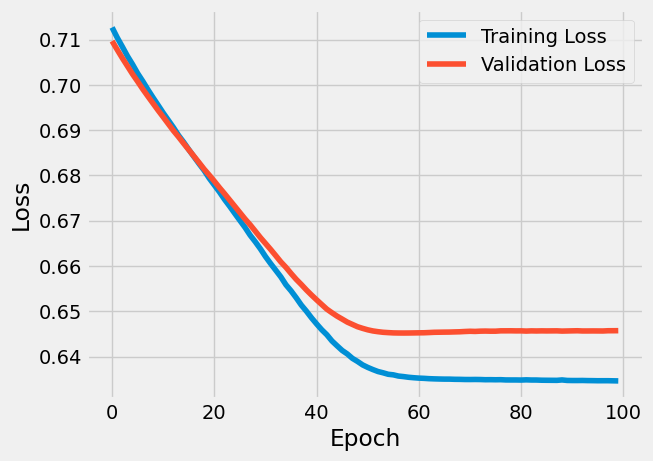

In [1279]:
plot_loss(history_3_features)

## Adding Two More Macro index: Training with 5 features
Here we will add two more features, including Dow Jones Industrial Index and California GDP, to examine the performance of our model.

In [1280]:
Y = final_data_AAPL['trend']
X = final_data_AAPL.drop(columns=['trend','company','DATE','NASDAQ100','DEXUSEU'], axis=1)

In [1281]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1147 non-null   float64
 1   volume  1147 non-null   int64  
 2   change  1147 non-null   float64
 3   GDP     1147 non-null   float64
 4   DJIA    1147 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 44.9 KB


In [1282]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1147 entries, 0 to 1146
Series name: trend
Non-Null Count  Dtype
--------------  -----
1147 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [1283]:
# Split the data into training and testing sets (70% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1284]:
X_test.shape

(230, 5)

In [1285]:
Y_test.shape

(230,)

In [1286]:
# Define sequence length (number of previous time steps to consider)
sequence_length = 30  # consider the previous 30 days

X_train_reshaped, X_test_reshaped, Y_test_reshaped = reshape_data(X_train_scaled, X_test_scaled, Y_test, sequence_length)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("Y_test_reshaped shape:", Y_test_reshaped.shape)

X_test_reshaped shape: (201, 30, 5)
Y_test_reshaped shape: (201,)


In [1287]:
X_train_reshaped.shape

(888, 30, 5)

In [1288]:
X_test_reshaped.shape

(201, 30, 5)

In [1289]:
# Define the LSTM model
model = Sequential([
    LSTM(units=10, input_shape=(sequence_length, X_train_reshaped.shape[2])),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_70 (LSTM)              (None, 10)                640       
                                                                 
 dense_70 (Dense)            (None, 1)                 11        
                                                                 
Total params: 651
Trainable params: 651
Non-trainable params: 0
_________________________________________________________________


2024-04-26 00:22:29.973469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:29.973889: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:29.974311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [1290]:
# Train the model
history_5_features = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=64, validation_split=0.3)

Epoch 1/100


2024-04-26 00:22:30.090217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:30.090836: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:30.091354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 20ms/step - loss: 0.7199 - accuracy: 0.3382 - val_loss: 0.7125 - val_accuracy: 0.3633
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7158 - accuracy: 0.3446 - val_loss: 0.7087 - val_accuracy: 0.3745
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7117 - accuracy: 0.3639 - val_loss: 0.7053 - val_accuracy: 0.3895
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.7165 - accuracy: 0.2812

2024-04-26 00:22:30.668958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:30.669764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:30.670197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 0s 4ms/step - loss: 0.7078 - accuracy: 0.3639 - val_loss: 0.7020 - val_accuracy: 0.4270
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7042 - accuracy: 0.3768 - val_loss: 0.6988 - val_accuracy: 0.4457
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7007 - accuracy: 0.4316 - val_loss: 0.6958 - val_accuracy: 0.4719
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.4589 - val_loss: 0.6929 - val_accuracy: 0.4981
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4895 - val_loss: 0.6901 - val_accuracy: 0.5543
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5233 - val_loss: 0.6874 - val_accuracy: 0.5880
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5459 - val_loss: 0.6849 - val_accuracy: 0.5805
Epoch 11/100
10/10 [====

In [1291]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_reshaped, Y_test_reshaped)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6310
Test Loss: 0.6621620655059814
Test Accuracy: 0.6309523582458496


2024-04-26 00:22:35.074879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:35.075446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:35.075883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

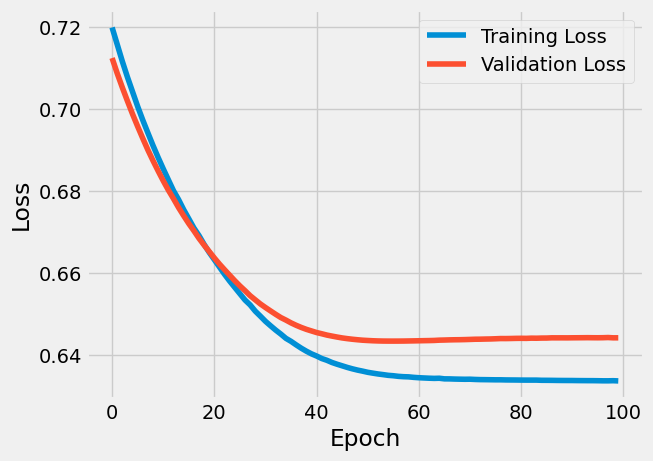

In [1292]:
plot_loss(history_5_features)

## Adding Two More Features: Training with 7 features
Here we added another two features to see if we can capture more non-linearity of our data. Dow Jones Industrial Index and US-Euro Exchange Rate were used.

In [1293]:
Y = final_data_AAPL['trend']
X = final_data_AAPL.drop(columns=['trend','company','DATE'], axis=1)

In [1294]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   close      1147 non-null   float64
 1   volume     1147 non-null   int64  
 2   change     1147 non-null   float64
 3   DEXUSEU    1147 non-null   float64
 4   GDP        1147 non-null   float64
 5   DJIA       1147 non-null   float64
 6   NASDAQ100  1147 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 62.9 KB


In [1295]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1147 entries, 0 to 1146
Series name: trend
Non-Null Count  Dtype
--------------  -----
1147 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [1296]:
# Split the data into training and testing sets (70% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1297]:
X_test.shape

(230, 7)

In [1298]:
Y_test.shape

(230,)

In [1299]:
# Define sequence length (number of previous time steps to consider)
sequence_length = 30  # consider the previous 30 days

X_train_reshaped, X_test_reshaped, Y_test_reshaped = reshape_data(X_train_scaled, X_test_scaled, Y_test, sequence_length)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("Y_test_reshaped shape:", Y_test_reshaped.shape)

X_test_reshaped shape: (201, 30, 7)
Y_test_reshaped shape: (201,)


In [1300]:
X_train_reshaped.shape

(888, 30, 7)

In [1301]:
X_test_reshaped.shape

(201, 30, 7)

In [1302]:
# Define the LSTM model
model = Sequential([
    LSTM(units=10, input_shape=(sequence_length, X_train_reshaped.shape[2])),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_71 (LSTM)              (None, 10)                720       
                                                                 
 dense_71 (Dense)            (None, 1)                 11        
                                                                 
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


2024-04-26 00:22:35.377258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:35.377707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:35.378121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [1303]:
# Train the model
history_7_features = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=64, validation_split=0.3)

Epoch 1/100


2024-04-26 00:22:35.495055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:35.495714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:35.496261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 20ms/step - loss: 0.6803 - accuracy: 0.6167 - val_loss: 0.6794 - val_accuracy: 0.5993
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6765 - accuracy: 0.6345 - val_loss: 0.6762 - val_accuracy: 0.6404
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6731 - accuracy: 0.6457 - val_loss: 0.6731 - val_accuracy: 0.6554
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.6714 - accuracy: 0.6719

2024-04-26 00:22:36.076461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:36.076998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:36.077708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.6522 - val_loss: 0.6701 - val_accuracy: 0.6592
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.6554 - val_loss: 0.6673 - val_accuracy: 0.6517
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6643 - accuracy: 0.6683 - val_loss: 0.6645 - val_accuracy: 0.6517
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.6699 - val_loss: 0.6622 - val_accuracy: 0.6517
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.6683 - val_loss: 0.6600 - val_accuracy: 0.6554
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6569 - accuracy: 0.6715 - val_loss: 0.6577 - val_accuracy: 0.6554
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.6699 - val_loss: 0.6559 - val_accuracy: 0.6554
Epoch 11/100
10/10 [====

In [1304]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_reshaped, Y_test_reshaped)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 995us/step - loss: 0.6686 - accuracy: 0.6310
Test Loss: 0.6686221957206726
Test Accuracy: 0.6309523582458496


2024-04-26 00:22:40.473181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:40.473713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:40.474240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

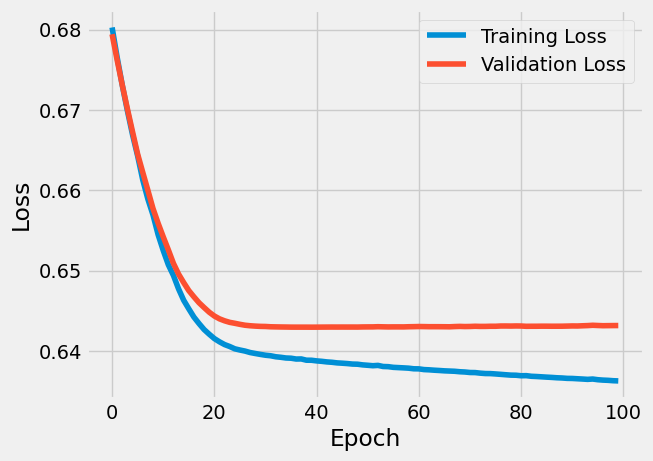

In [1305]:
plot_loss(history_7_features)

Observation: the accuary of test data set has decreased with more features added.

## Adding more units to LSTM layer with 5 features
Here we change the LSTM layer from 10 units to 20 units.

In [1306]:
Y = final_data_AAPL['trend']
X = final_data_AAPL.drop(columns=['trend','company','DATE','NASDAQ100','DEXUSEU'], axis=1)

In [1307]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1147 non-null   float64
 1   volume  1147 non-null   int64  
 2   change  1147 non-null   float64
 3   GDP     1147 non-null   float64
 4   DJIA    1147 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 44.9 KB


In [1308]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1147 entries, 0 to 1146
Series name: trend
Non-Null Count  Dtype
--------------  -----
1147 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [1309]:
# Split the data into training and testing sets (70% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1310]:
X_test.shape

(230, 5)

In [1311]:
Y_test.shape

(230,)

In [1312]:
# Define sequence length (number of previous time steps to consider)
sequence_length = 30  # consider the previous 30 days

X_train_reshaped, X_test_reshaped, Y_test_reshaped = reshape_data(X_train_scaled, X_test_scaled, Y_test, sequence_length)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("Y_test_reshaped shape:", Y_test_reshaped.shape)

X_test_reshaped shape: (201, 30, 5)
Y_test_reshaped shape: (201,)


In [1313]:
X_train_reshaped.shape

(888, 30, 5)

In [1314]:
X_test_reshaped.shape

(201, 30, 5)

In [1315]:
# Define the LSTM model
model = Sequential([
    LSTM(units=20, input_shape=(sequence_length, X_train_reshaped.shape[2])),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 20)                2080      
                                                                 
 dense_72 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________


2024-04-26 00:22:40.779502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:40.780051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:40.780408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [1316]:
# Train the model
history_20_units = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=64, validation_split=0.3)

Epoch 1/100


2024-04-26 00:22:40.896783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:40.897395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:40.897911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 21ms/step - loss: 0.6829 - accuracy: 0.6699 - val_loss: 0.6814 - val_accuracy: 0.6554
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.6699 - val_loss: 0.6782 - val_accuracy: 0.6554
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6757 - accuracy: 0.6699 - val_loss: 0.6751 - val_accuracy: 0.6554
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.7188

2024-04-26 00:22:41.480840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:41.481410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:41.482064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 0s 5ms/step - loss: 0.6721 - accuracy: 0.6699 - val_loss: 0.6723 - val_accuracy: 0.6554
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6691 - accuracy: 0.6699 - val_loss: 0.6696 - val_accuracy: 0.6554
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6662 - accuracy: 0.6699 - val_loss: 0.6669 - val_accuracy: 0.6554
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6631 - accuracy: 0.6699 - val_loss: 0.6645 - val_accuracy: 0.6554
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6604 - accuracy: 0.6699 - val_loss: 0.6621 - val_accuracy: 0.6554
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6578 - accuracy: 0.6699 - val_loss: 0.6598 - val_accuracy: 0.6554
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6550 - accuracy: 0.6699 - val_loss: 0.6578 - val_accuracy: 0.6554
Epoch 11/100
10/10 [====

In [1317]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_reshaped, Y_test_reshaped)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6310
Test Loss: 0.6680411100387573
Test Accuracy: 0.6309523582458496


2024-04-26 00:22:46.510630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:46.511129: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:46.511702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

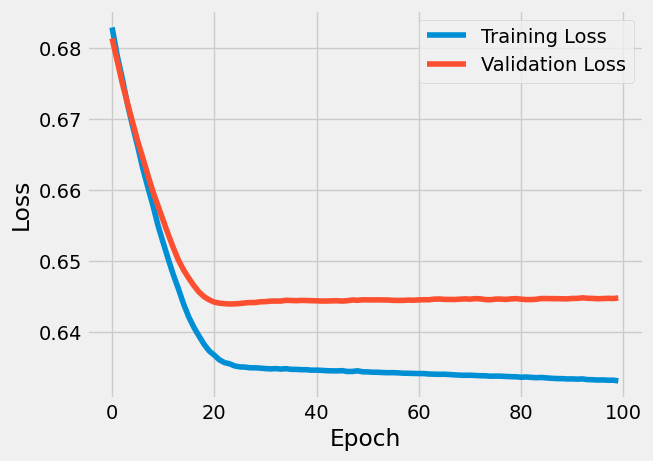

In [1318]:
plot_loss(history_20_units)

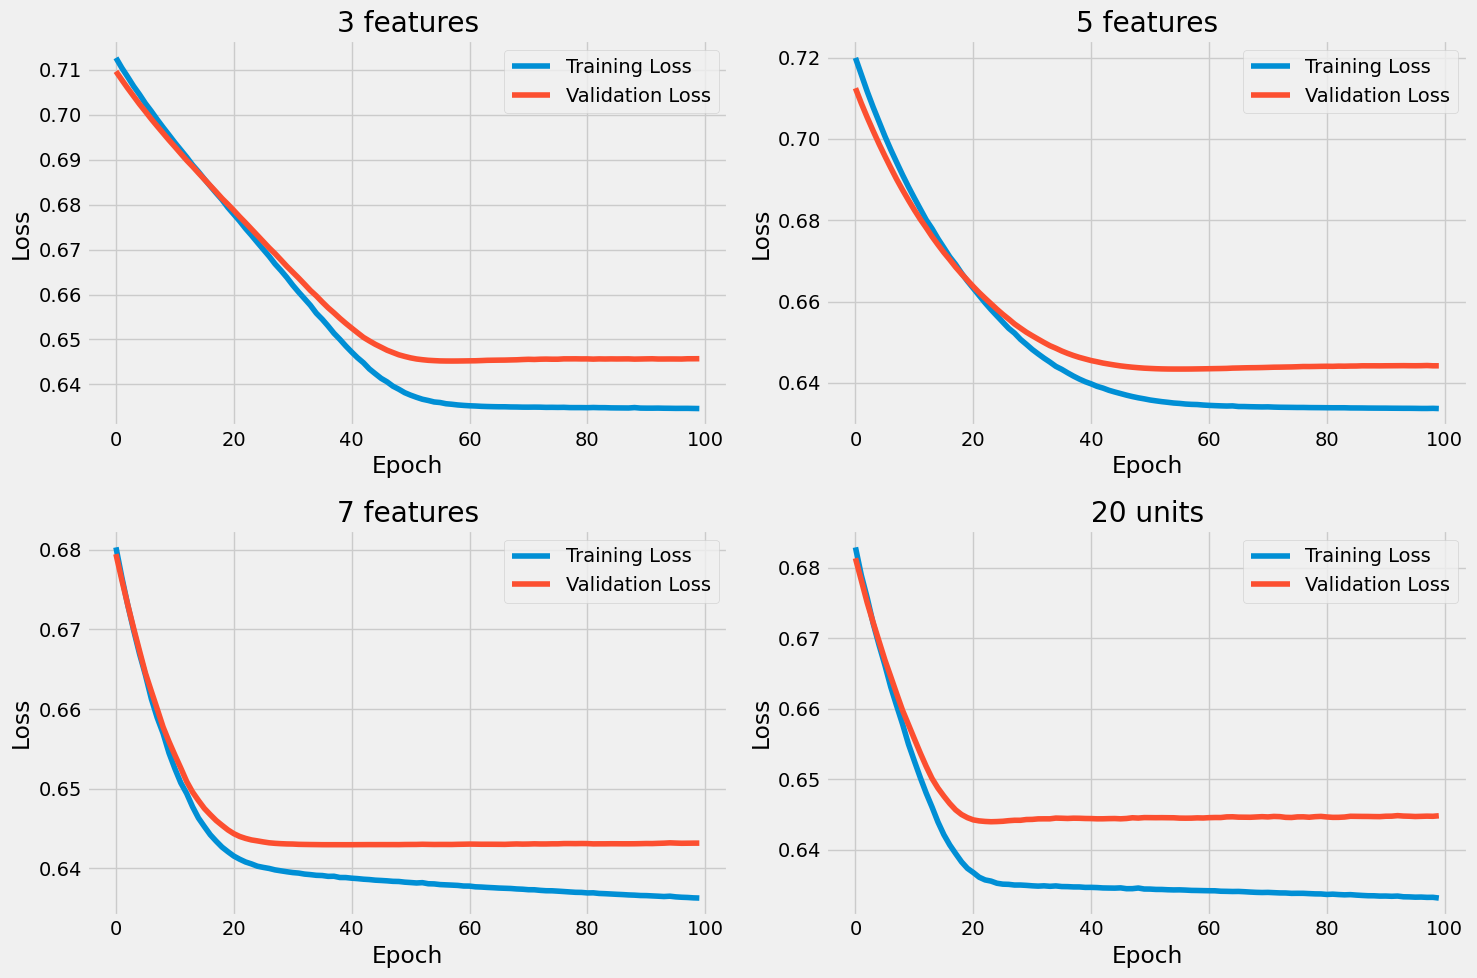

In [1319]:
def plot_multiple_losses(histories, titles):
    # Set up the matplotlib figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.ravel()  # Convert the 2x2 grid into a flat array for easier indexing
    
    for i, history in enumerate(histories):
        # Plot training loss
        axs[i].plot(history.history['loss'], label='Training Loss')
        # Plot validation loss
        axs[i].plot(history.history['val_loss'], label='Validation Loss')
        # Set title
        axs[i].set_title(titles[i])
        # Set common labels
        axs[i].set_xlabel('Epoch')
        axs[i].set_ylabel('Loss')
        # Show legend
        axs[i].legend()
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()
    
plot_multiple_losses([history_3_features, history_5_features, history_7_features, history_20_units], ["3 features", "5 features", "7 features", "20 units"])

# Modeling with LSTM Model for TSLA Stock

In [1320]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Starting with 3 features
Here will examine how's the modeling go with just basic features of the stock prices: close, volume, change

In [1321]:
Y = final_data_TSLA['trend']
X = final_data_TSLA.drop(columns=['trend','company','DATE','NASDAQ100','DEXUSEU','DJIA','GDP'], axis=1)

In [1322]:
X.head()

,close,volume,change
0,237.41,149762546,2.38
1,223.71,140428469,8.11
2,214.65,131295153,4.62
3,209.98,142065154,-9.77
4,222.11,106384841,-1.04


In [1323]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1147 non-null   float64
 1   volume  1147 non-null   int64  
 2   change  1147 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 27.0 KB


In [1324]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1147 entries, 0 to 1146
Series name: trend
Non-Null Count  Dtype
--------------  -----
1147 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [1325]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1326]:
X_test.shape

(230, 3)

In [1327]:
Y_test.shape

(230,)

In [1328]:
# Define sequence length (number of previous time steps to consider)
sequence_length = 30  # consider the previous 30 days

X_train_reshaped, X_test_reshaped, Y_test_reshaped = reshape_data(X_train_scaled, X_test_scaled, Y_test, sequence_length)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("Y_test_reshaped shape:", Y_test_reshaped.shape)

X_test_reshaped shape: (201, 30, 3)
Y_test_reshaped shape: (201,)


In [1329]:
X_train_reshaped.shape

(888, 30, 3)

In [1330]:
X_test_reshaped.shape

(201, 30, 3)

In [1331]:
# Define the LSTM model
model = Sequential([
    LSTM(units=10, input_shape=(sequence_length, X_train_reshaped.shape[2])),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_73 (LSTM)              (None, 10)                560       
                                                                 
 dense_73 (Dense)            (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


2024-04-26 00:22:47.323360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:47.323884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:47.324305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [1332]:
# Train the model
history_3_features = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=64, validation_split=0.3)

Epoch 1/100


2024-04-26 00:22:47.427129: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:47.427877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:47.428496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 20ms/step - loss: 0.6849 - accuracy: 0.6151 - val_loss: 0.6830 - val_accuracy: 0.6217
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6840 - accuracy: 0.6151 - val_loss: 0.6820 - val_accuracy: 0.6217
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.6151 - val_loss: 0.6810 - val_accuracy: 0.6217
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.6151 - val_loss: 0.6801 - val_accuracy: 0.6217
Epoch 5/100


2024-04-26 00:22:48.003214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:48.004035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:48.004472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.6151 - val_loss: 0.6792 - val_accuracy: 0.6217
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6807 - accuracy: 0.6151 - val_loss: 0.6783 - val_accuracy: 0.6217
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6799 - accuracy: 0.6151 - val_loss: 0.6775 - val_accuracy: 0.6217
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6792 - accuracy: 0.6151 - val_loss: 0.6766 - val_accuracy: 0.6217
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.6151 - val_loss: 0.6760 - val_accuracy: 0.6217
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.6151 - val_loss: 0.6752 - val_accuracy: 0.6217
Epoch 11/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6770 - accuracy: 0.6151 - val_loss: 0.6745 - val_accuracy: 0.6217
Epoch 12/100
10/10 [===

In [1333]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_reshaped, Y_test_reshaped)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.5928
Test Loss: 0.678400993347168
Test Accuracy: 0.5927578806877136


2024-04-26 00:22:52.573865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:52.574403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:52.575010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [1334]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

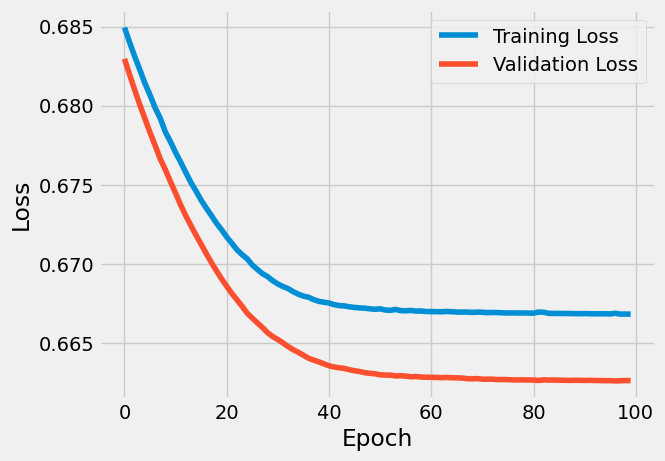

In [1335]:
plot_loss(history_3_features)

## Adding Two More Macro index: Training with 5 features
Here we will add two more features, including Dow Jones Industrial Index and California GDP, to examine the performance of our model.

In [1336]:
Y = final_data_TSLA['trend']
X = final_data_TSLA.drop(columns=['trend','company','DATE','NASDAQ100','DEXUSEU'], axis=1)

In [1337]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1147 non-null   float64
 1   volume  1147 non-null   int64  
 2   change  1147 non-null   float64
 3   GDP     1147 non-null   float64
 4   DJIA    1147 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 44.9 KB


In [1338]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1147 entries, 0 to 1146
Series name: trend
Non-Null Count  Dtype
--------------  -----
1147 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [1339]:
# Split the data into training and testing sets (70% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1340]:
X_test.shape

(230, 5)

In [1341]:
Y_test.shape

(230,)

In [1342]:
# Define sequence length (number of previous time steps to consider)
sequence_length = 30  # consider the previous 30 days

X_train_reshaped, X_test_reshaped, Y_test_reshaped = reshape_data(X_train_scaled, X_test_scaled, Y_test, sequence_length)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("Y_test_reshaped shape:", Y_test_reshaped.shape)

X_test_reshaped shape: (201, 30, 5)
Y_test_reshaped shape: (201,)


In [1343]:
X_train_reshaped.shape

(888, 30, 5)

In [1344]:
X_test_reshaped.shape

(201, 30, 5)

In [1345]:
# Define the LSTM model
model = Sequential([
    LSTM(units=10, input_shape=(sequence_length, X_train_reshaped.shape[2])),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_74 (LSTM)              (None, 10)                640       
                                                                 
 dense_74 (Dense)            (None, 1)                 11        
                                                                 
Total params: 651
Trainable params: 651
Non-trainable params: 0
_________________________________________________________________


2024-04-26 00:22:52.882692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:52.883100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:52.883600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [1346]:
# Train the model
history_5_features = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=64, validation_split=0.3)

Epoch 1/100


2024-04-26 00:22:53.002762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:53.003646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:53.004198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 21ms/step - loss: 0.6823 - accuracy: 0.6151 - val_loss: 0.6819 - val_accuracy: 0.6217
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6808 - accuracy: 0.6151 - val_loss: 0.6803 - val_accuracy: 0.6217
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6796 - accuracy: 0.6151 - val_loss: 0.6788 - val_accuracy: 0.6217
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.6151 - val_loss: 0.6775 - val_accuracy: 0.6217
Epoch 5/100


2024-04-26 00:22:53.588204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:53.588956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:53.589513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 0s 4ms/step - loss: 0.6771 - accuracy: 0.6151 - val_loss: 0.6764 - val_accuracy: 0.6217
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.6151 - val_loss: 0.6753 - val_accuracy: 0.6217
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.6151 - val_loss: 0.6744 - val_accuracy: 0.6217
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.6151 - val_loss: 0.6734 - val_accuracy: 0.6217
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6733 - accuracy: 0.6151 - val_loss: 0.6725 - val_accuracy: 0.6217
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6725 - accuracy: 0.6151 - val_loss: 0.6717 - val_accuracy: 0.6217
Epoch 11/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.6151 - val_loss: 0.6709 - val_accuracy: 0.6217
Epoch 12/100
10/10 [===

In [1347]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_reshaped, Y_test_reshaped)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.5928
Test Loss: 0.6769677996635437
Test Accuracy: 0.5927578806877136


2024-04-26 00:22:58.062333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:58.062871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:58.063317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

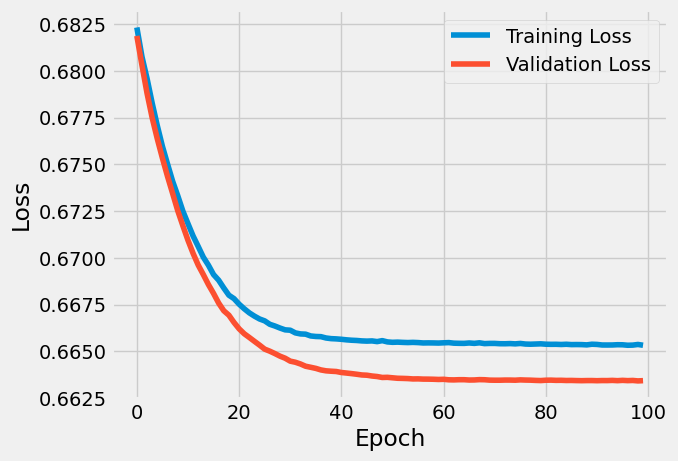

In [1348]:
plot_loss(history_5_features)

## Adding Two More Features: Training with 7 features
Here we added another two features to see if we can capture more non-linearity of our data. Dow Jones Industrial Index and US-Euro Exchange Rate were used.

In [1349]:
Y = final_data_TSLA['trend']
X = final_data_TSLA.drop(columns=['trend','company','DATE'], axis=1)

In [1350]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   close      1147 non-null   float64
 1   volume     1147 non-null   int64  
 2   change     1147 non-null   float64
 3   DEXUSEU    1147 non-null   float64
 4   GDP        1147 non-null   float64
 5   DJIA       1147 non-null   float64
 6   NASDAQ100  1147 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 62.9 KB


In [1351]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1147 entries, 0 to 1146
Series name: trend
Non-Null Count  Dtype
--------------  -----
1147 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [1352]:
# Split the data into training and testing sets (70% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1353]:
X_test.shape

(230, 7)

In [1354]:
Y_test.shape

(230,)

In [1355]:
# Define sequence length (number of previous time steps to consider)
sequence_length = 30  # consider the previous 30 days

X_train_reshaped, X_test_reshaped, Y_test_reshaped = reshape_data(X_train_scaled, X_test_scaled, Y_test, sequence_length)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("Y_test_reshaped shape:", Y_test_reshaped.shape)

X_test_reshaped shape: (201, 30, 7)
Y_test_reshaped shape: (201,)


In [1356]:
X_train_reshaped.shape

(888, 30, 7)

In [1357]:
X_test_reshaped.shape

(201, 30, 7)

In [1358]:
# Define the LSTM model
model = Sequential([
    LSTM(units=10, input_shape=(sequence_length, X_train_reshaped.shape[2])),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_75 (LSTM)              (None, 10)                720       
                                                                 
 dense_75 (Dense)            (None, 1)                 11        
                                                                 
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


2024-04-26 00:22:58.377916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:58.378448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:58.378792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [1359]:
# Train the model
history_7_features = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=64, validation_split=0.3)

Epoch 1/100


2024-04-26 00:22:58.491502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:58.492159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:58.492890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 20ms/step - loss: 0.7773 - accuracy: 0.3849 - val_loss: 0.7679 - val_accuracy: 0.3783
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7699 - accuracy: 0.3849 - val_loss: 0.7611 - val_accuracy: 0.3783
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7629 - accuracy: 0.3849 - val_loss: 0.7545 - val_accuracy: 0.3783
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.7490 - accuracy: 0.3906

2024-04-26 00:22:59.065038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:22:59.065526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:22:59.065985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 0s 4ms/step - loss: 0.7562 - accuracy: 0.3849 - val_loss: 0.7482 - val_accuracy: 0.3783
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7499 - accuracy: 0.3849 - val_loss: 0.7420 - val_accuracy: 0.3783
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7436 - accuracy: 0.3865 - val_loss: 0.7364 - val_accuracy: 0.3745
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7381 - accuracy: 0.3881 - val_loss: 0.7308 - val_accuracy: 0.3783
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7321 - accuracy: 0.3929 - val_loss: 0.7257 - val_accuracy: 0.3858
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7271 - accuracy: 0.3961 - val_loss: 0.7206 - val_accuracy: 0.3970
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7220 - accuracy: 0.3929 - val_loss: 0.7157 - val_accuracy: 0.4082
Epoch 11/100
10/10 [====

In [1360]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_reshaped, Y_test_reshaped)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.5928
Test Loss: 0.6696385145187378
Test Accuracy: 0.5927578806877136


2024-04-26 00:23:03.444111: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:23:03.444646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:23:03.445074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

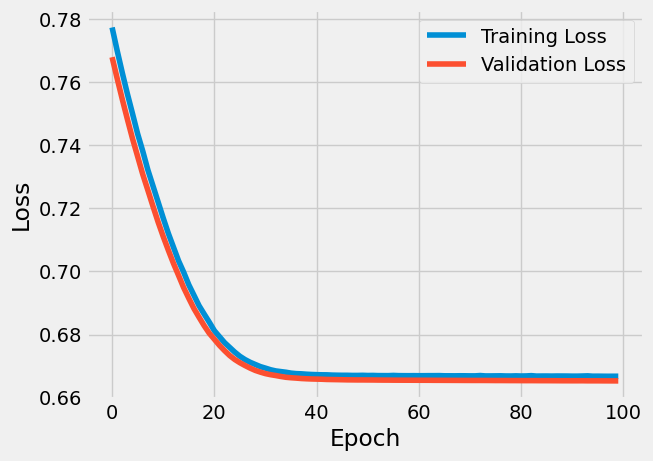

In [1361]:
plot_loss(history_7_features)

Observation: this displays an overfitting pattern.

## Adding more units to LSTM layer with 5 features
Here we change the LSTM layer from 10 units to 20 units.

In [1362]:
Y = final_data_TSLA['trend']
X = final_data_TSLA.drop(columns=['trend','company','DATE','NASDAQ100','DEXUSEU'], axis=1)

In [1363]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1147 non-null   float64
 1   volume  1147 non-null   int64  
 2   change  1147 non-null   float64
 3   GDP     1147 non-null   float64
 4   DJIA    1147 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 44.9 KB


In [1364]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1147 entries, 0 to 1146
Series name: trend
Non-Null Count  Dtype
--------------  -----
1147 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [1365]:
# Split the data into training and testing sets (70% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1366]:
X_test.shape

(230, 5)

In [1367]:
Y_test.shape

(230,)

In [1368]:
# Define sequence length (number of previous time steps to consider)
sequence_length = 30  # consider the previous 30 days

X_train_reshaped, X_test_reshaped, Y_test_reshaped = reshape_data(X_train_scaled, X_test_scaled, Y_test, sequence_length)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("Y_test_reshaped shape:", Y_test_reshaped.shape)

X_test_reshaped shape: (201, 30, 5)
Y_test_reshaped shape: (201,)


In [1369]:
X_train_reshaped.shape

(888, 30, 5)

In [1370]:
X_test_reshaped.shape

(201, 30, 5)

In [1371]:
# Define the LSTM model
model = Sequential([
    LSTM(units=20, input_shape=(sequence_length, X_train_reshaped.shape[2])),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_76 (LSTM)              (None, 20)                2080      
                                                                 
 dense_76 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________


2024-04-26 00:23:03.744035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:23:03.744579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:23:03.744943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [1372]:
# Train the model
history_20_units = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=64, validation_split=0.3)

Epoch 1/100


2024-04-26 00:23:03.858978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:23:03.859705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:23:03.860304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 21ms/step - loss: 0.6862 - accuracy: 0.5813 - val_loss: 0.6849 - val_accuracy: 0.5768
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.5845 - val_loss: 0.6826 - val_accuracy: 0.6067
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.5990 - val_loss: 0.6802 - val_accuracy: 0.6067
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.6792 - accuracy: 0.6406

2024-04-26 00:23:04.436811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:23:04.437398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:23:04.438033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 0s 5ms/step - loss: 0.6798 - accuracy: 0.6119 - val_loss: 0.6782 - val_accuracy: 0.6067
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6781 - accuracy: 0.6119 - val_loss: 0.6764 - val_accuracy: 0.6217
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6767 - accuracy: 0.6135 - val_loss: 0.6745 - val_accuracy: 0.6217
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6751 - accuracy: 0.6151 - val_loss: 0.6730 - val_accuracy: 0.6217
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6738 - accuracy: 0.6151 - val_loss: 0.6716 - val_accuracy: 0.6217
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6727 - accuracy: 0.6151 - val_loss: 0.6704 - val_accuracy: 0.6217
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6717 - accuracy: 0.6151 - val_loss: 0.6691 - val_accuracy: 0.6217
Epoch 11/100
10/10 [====

In [1373]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_reshaped, Y_test_reshaped)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5928
Test Loss: 0.683892011642456
Test Accuracy: 0.5927578806877136


2024-04-26 00:23:09.264876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-26 00:23:09.265496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-26 00:23:09.265996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

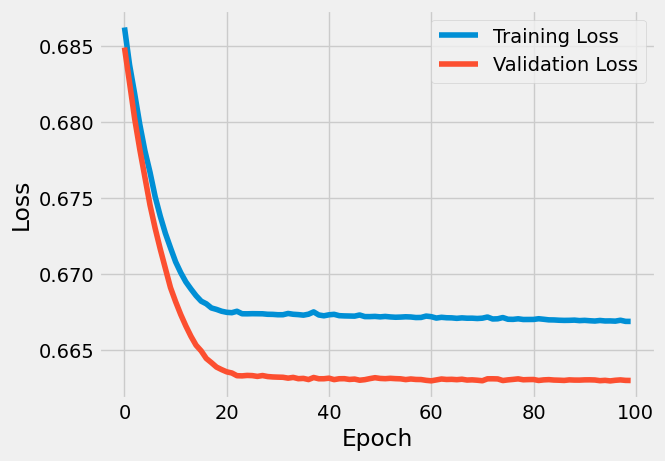

In [1374]:
plot_loss(history_20_units)

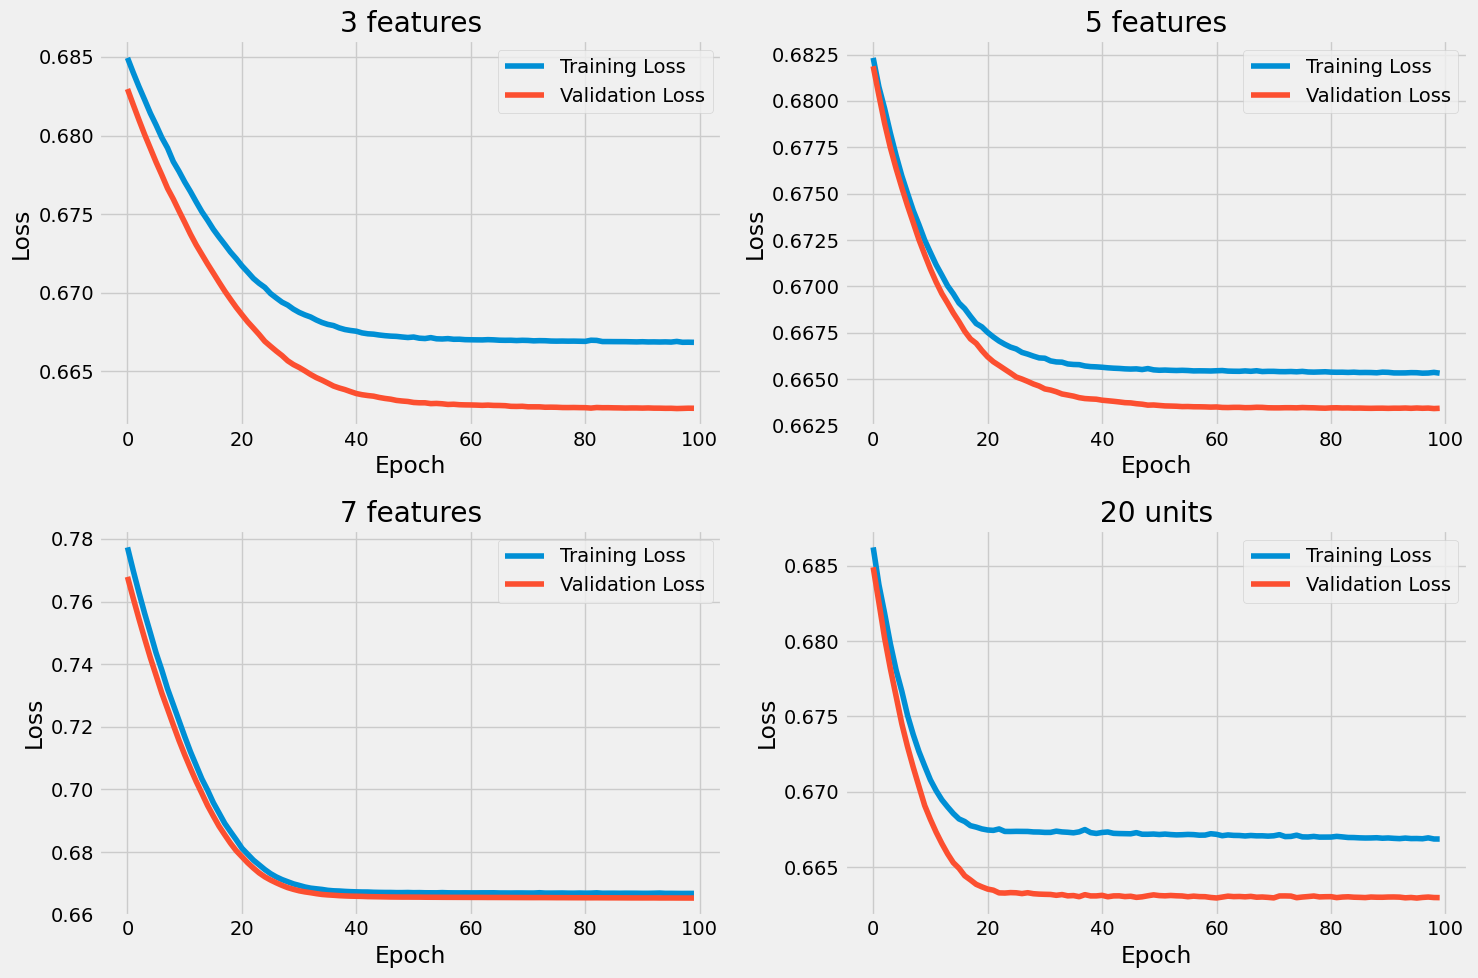

In [1375]:
plot_multiple_losses([history_3_features, history_5_features, history_7_features, history_20_units], ["3 features", "5 features", "7 features", "20 units"])

# Modeling with Decision Tree Classifier
Here we want to examine other models to see if it does better with stock prediction.

## AAPL Stock

In [1376]:
from sklearn.model_selection import train_test_split
Y = final_data_AAPL['trend']
X = final_data_AAPL.drop(columns=['trend','company','DATE'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
tree_acc = accuracy_score(Y_test, Y_pred)
print('Accuracy',tree_acc)

Accuracy 0.6695652173913044


## TSLA Stock

In [1377]:
Y = final_data_TSLA['trend']
X = final_data_TSLA.drop(columns=['trend','company','DATE'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
tree_acc = accuracy_score(Y_test, Y_pred)
print('Accuracy',tree_acc)

Accuracy 0.7536231884057971
